<a href="https://githubtocolab.com/Sher016/IA/blob/main/01%20-%20exploración.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>


 
 # Heart Failure Prediction
 Exploración de dataset de datos cardiacos para clasificación de enfermedades cardiovasculares


Primero, se hará una breve descripción de las variables correspondientes a las columnas del data set. Son 13 columnas en total. El target de éste proyecto es la DEATH EVENT. Éste indica si un paciente ha fallecido o no debido a un evento relacionado con su condición cardiovascular:

Valor 0: El paciente no ha fallecido (sigue vivo).
Valor 1: El paciente ha fallecido (evento de muerte relacionado).
El resto de las columnas (edad, anemia, serum sodium, etc.) son factores que podrían influir en la probabilidad de un "Death Event".

Ahora, este es un problema de clasificación, pero el objetivo es predecir si un paciente sufrirá un evento de muerte o no  basándose en las características del paciente, como edad, anemia, niveles de sodio en suero, etc.

El objetivo finalmente es utilizar varios algoritmos para construir un modelo que prediga la variable "Death Event" a partir de estas características.

| **Columna**              | **Tipo de Dato**  | **Rango/Valores**                | **Descripción** |
|--------------------------|------------------|----------------------------------|-----------------|
| **Edad**                 | Numérico         | 40 a 95 años                     | La edad del paciente en años. Es una característica continua que puede influir en la probabilidad de eventos cardiovasculares. |
| **Anemia**               | Booleano (0 o 1) | 0: No, 1: Sí                     | Indica si el paciente tiene anemia (1) o no (0). La anemia puede ser un factor de riesgo para enfermedades cardiovasculares. |
| **Creatinina**           | Numérico         | 23 a 7861 mcg/L                  | Nivel de creatinina en la sangre. Puede indicar la función renal. |
| **Diabetes**             | Booleano (0 o 1) | 0: No, 1: Sí                     | Indica si el paciente tiene diabetes (1) o no (0). La diabetes es un factor de riesgo para enfermedades cardiovasculares. |
| **Fracción de eyección**  | Numérico (%)     | 14% a 80%                        | Medida del porcentaje de sangre que el corazón expulsa con cada latido. Es un indicador de la función cardíaca. |
| **Presión arterial alta** | Booleano (0 o 1) | 0: No, 1: Sí                     | Indica si el paciente tiene presión arterial alta (1) o no (0). |
| **Plaquetas**            | Numérico         | 25.1k a 850k kiloplatelets/mL     | Número de plaquetas en la sangre. Las plaquetas ayudan en la coagulación. |
| **Creatinina sérica**     | Numérico         | 0.5 a 9.4 mg/dL                  | Nivel de creatinina en el suero sanguíneo. Puede reflejar la función renal. |
| **Sodio sérico**         | Numérico         | 113 a 148 mEq/L                  | Nivel de sodio en el suero sanguíneo. El sodio es esencial para el equilibrio de fluidos y la función celular. |
| **Sexo**                 | Booleano (0 o 1) | 0: Masculino, 1: Femenino         | Indica el sexo del paciente. La codificación puede variar según el dataset. |
| **Tiempo**               | Numérico         | -                                | Período de seguimiento en días. Representa la duración durante la cual se monitoriza al paciente. |
| **Evento de muerte**      | Booleano (0 o 1) | 0: No, 1: Sí                     | Indica si el paciente falleció durante el período de seguimiento (1) o no (0). Esta es la variable objetivo. |

Finalmente, el modelo se evaluará con varias métricas como RMAE, MSE, neg R2 score y los ratios de MAE y RMSE.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

In [ ]:
!unzip heart-failure-clinical-data.zip

# Código
Ahora, se realizará primero la carga de los archivos para posteriormente hacerle una exploración a estos, la exploración será de forma estadistica, se mostrará mediante graficas qué tipo de distribución tienen los datos, y se tomarán a analizar posteriormente datos que tengan una distribución normal representativa o en caso de los booleanos, que presenten una diferencia significativa. La visualización de la distribución de los datos ayuda a identificar patrones, sesgos y anomalías, es más cómodo de analizar en términos estadisticos.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing as ps
from difflib import SequenceMatcher

Se carga la información en forma de dataframe utilizando pandas

In [6]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")#lee los datos
df.head()#muestra solo los primeros datos del df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Ahora, se realizan gráficas mediante histogramas para observar la distribución de las variables

para poder agilizar y facilitar el flujo de exploración de datos, se usaran funciones para graficar y sacar valores estadisticos.

In [8]:
def plot_histogram(factor, target, bins=40, color1='red', color2='blue', alpha=0.5):
    factor1 = df[factor]  
    target_values = df[target]

    plt.figure(figsize=(12, 6))
    width = (factor1.max() - factor1.min()) / bins * 0.8
    plt.hist(factor1[target_values == 1], bins=bins, color=color1, alpha=alpha, label='Murieron',rwidth=0.8,histtype='bar', width=width)
    plt.hist(factor1[target_values == 0], bins=bins, color=color2, alpha=alpha, label='No murieron',rwidth=0.8,histtype='bar',width=width)

    plt.title(f'Distribución de {factor} según el Evento de Muerte')  # Uso de f-strings para concatenar
    plt.xlabel(factor)
    plt.ylabel('Frecuencia')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

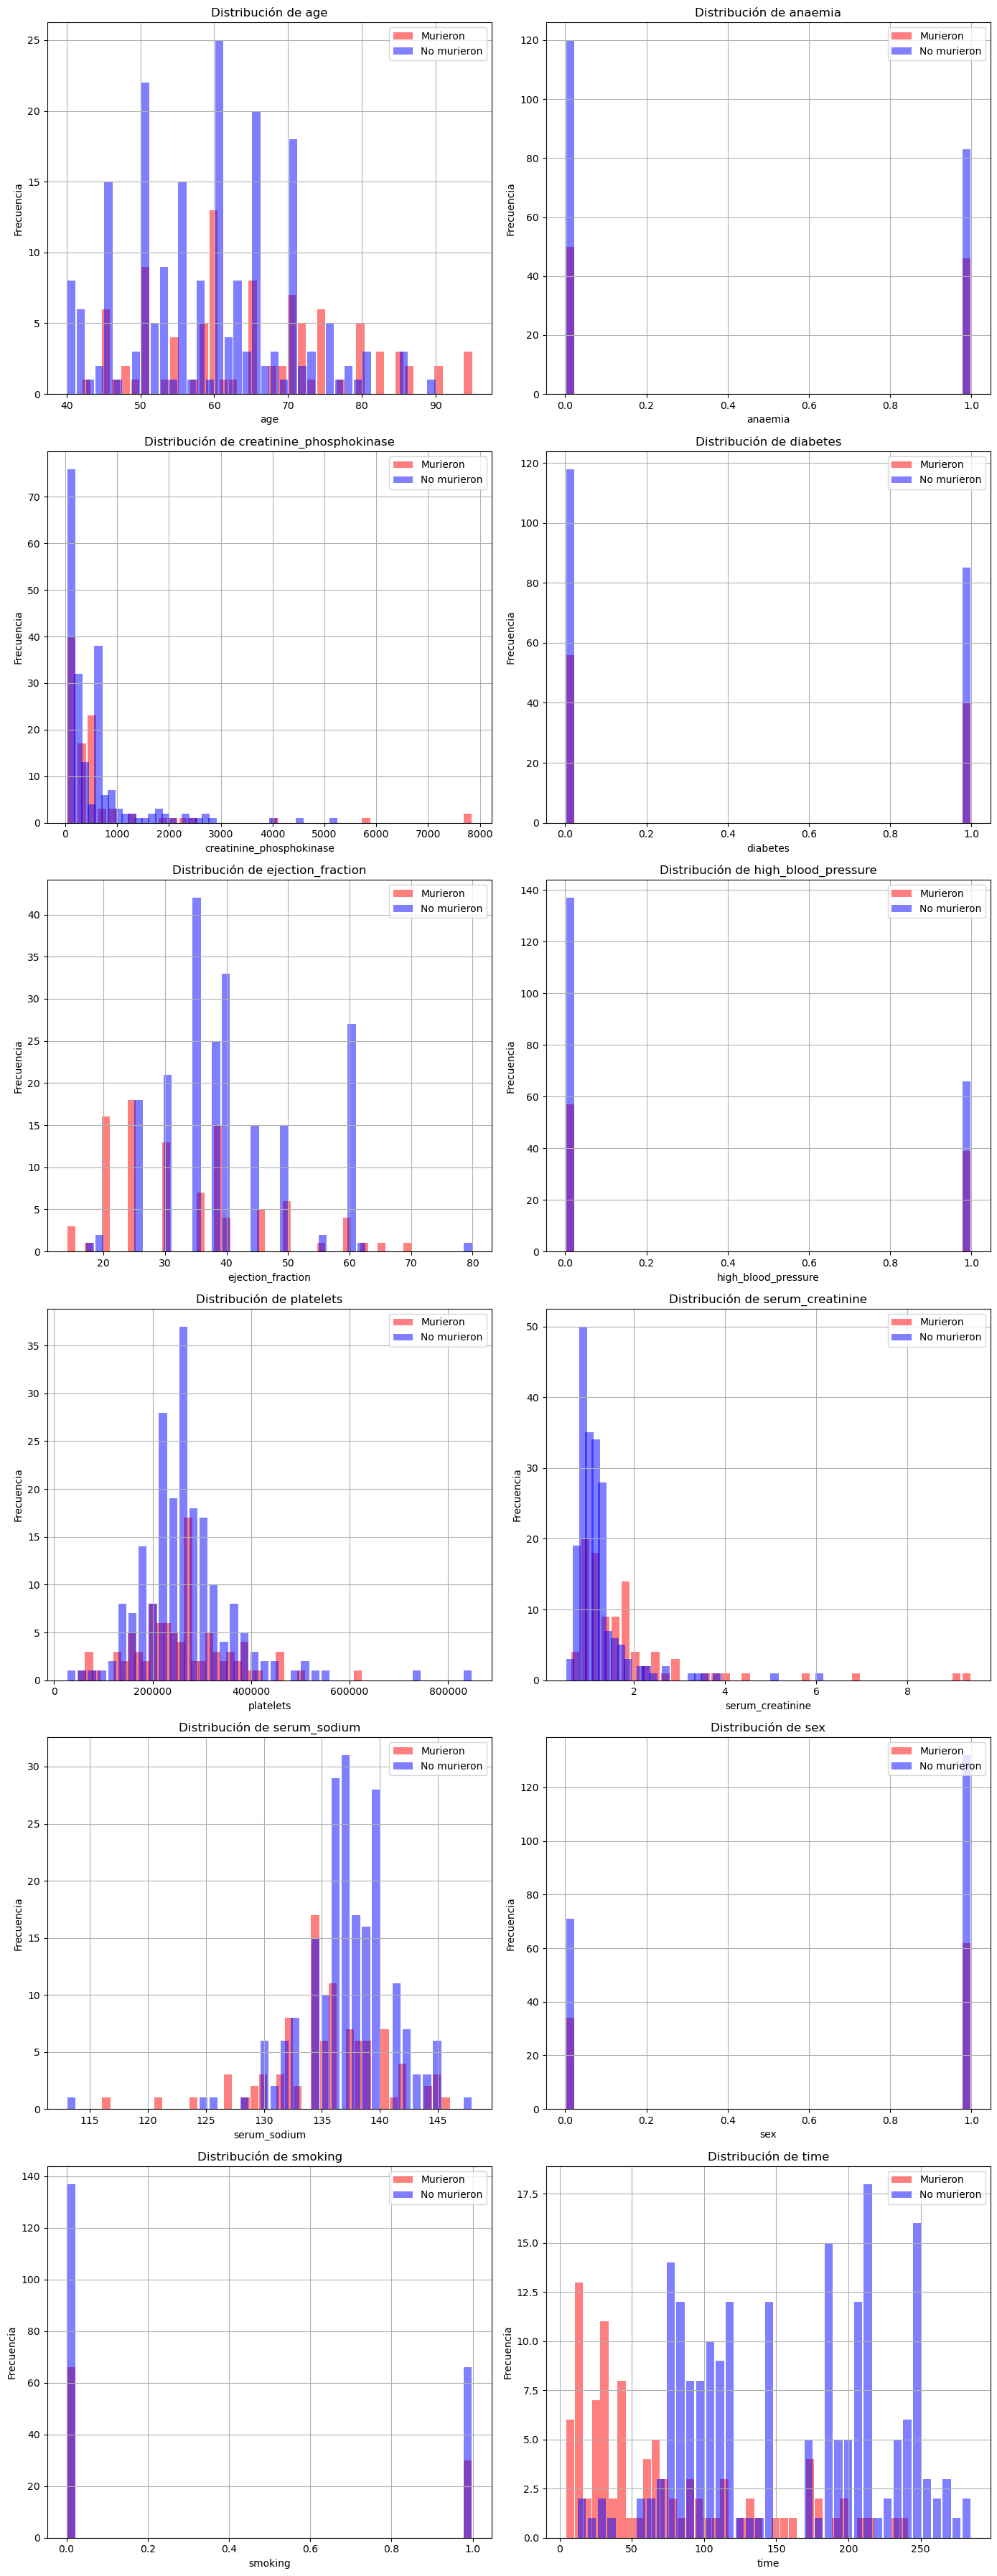

In [37]:
def plot_multiple_his(factors, target, bins=40, color1='red', color2='blue', alpha=0.5):
    n_factors = len(factors)
    fig, axes = plt.subplots(nrows=(n_factors // 2) + (n_factors % 2), ncols=2, figsize=(14, 6 * (n_factors // 2)))
    axes = axes.ravel() if n_factors > 1 else [axes]
    
    for i, factor in enumerate(factors):
        factor1 = df[factor]
        target_values = df[target]   
        width = (factor1.max() - factor1.min()) / bins * 0.8
        
        axes[i].hist(factor1[target_values == 1], bins=bins, color=color1, alpha=alpha, label='Murieron', rwidth=0.8, histtype='bar', width=width)
        axes[i].hist(factor1[target_values == 0], bins=bins, color=color2, alpha=alpha, label='No murieron', rwidth=0.8, histtype='bar', width=width)
        
        axes[i].set_title(f'Distribución de {factor}')
        axes[i].set_xlabel(factor)
        axes[i].set_ylabel('Frecuencia')
        axes[i].legend(loc='upper right')
        axes[i].grid(True)
    
    plt.tight_layout()
    plt.show()

columnas = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
plot_multiple_his(columnas, 'DEATH_EVENT')

Éstos gráficos muestran cómo se comportan los factores que tienen datos númericos variados como la edad, tiempo, el serum de sodio,las plaquetas, la creatinina, etc.
Por ejemplo, para el factor "serum sodium", a grandes rasgos se observa que los que tuvieron dosis mayores a 130, más especificamente entre 136 y 140, superan en superviviencia a los que sí murieron. Por tanto, éste podria ser un factor de importancia para el modelo. 

Se observa además que, para los datos que son booleanos, un histograma no es muy representativo, por tanto se evalúan entonces otras formas de mostrar la información de manera que sea últil a la hora de encontrar diferencias en los factores. Esto ayudará a elegir correctamente la información que se utilizará en el modelo posteriormente.

In [38]:
#para crear una diagrama de barras
def plot_bar(df, factor, target):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=factor, hue=target, data=df)
    plt.title(f' {factor} vs {target}', fontsize=16)
    plt.xlabel(factor, fontsize=12)
    plt.ylabel('Conteo', fontsize=12)
    plt.legend(title=target)
    plt.show()



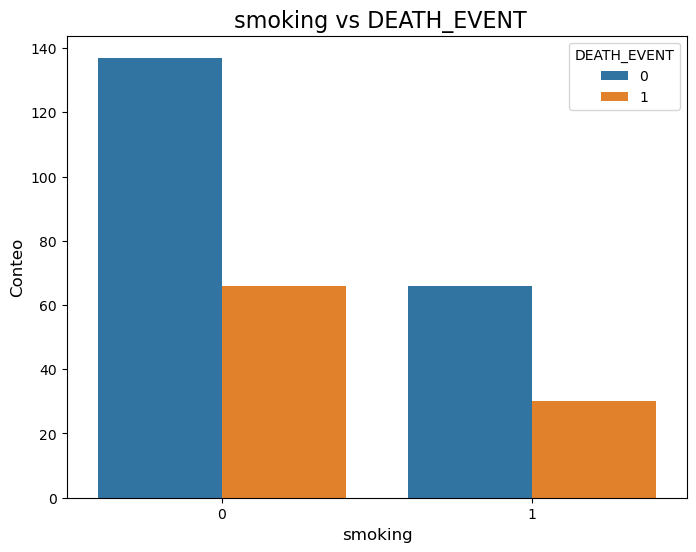

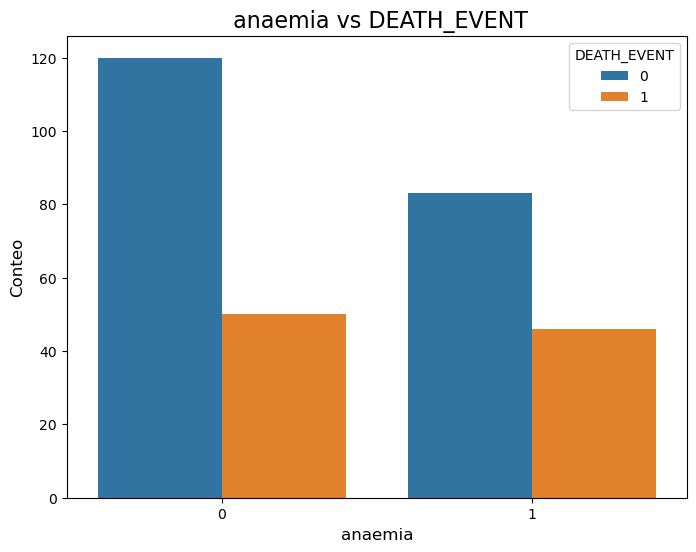

In [40]:
plot_bar(df,'smoking','DEATH_EVENT')
plot_bar(df,'anaemia','DEATH_EVENT')

Un diagrama de barras en éstos casos es una manera viable de observar los datos ya que se pueden sacar varias inferencias. Por ejemplo, en el caso de el factor "Smoking" que se refiere a si la persona fuma o no, se observa que al parecer para éste tipo de problemas cardiovasculares y éste dataset no fue significativo, ya que los pacientes que no fumaron murieron más que los que sí. Entonces, es prefrible tomar otro factor que sí sea significativo para el objetivo del modelo.

Además del diagrama de barras, se exploran otras formas de relacionar diferentes factores como lo es un scatter plot. Éste tipo de gráfico de dispersión es una representación gráfica que muestra la relación entre dos variables numéricas.

SCATTER PLOT


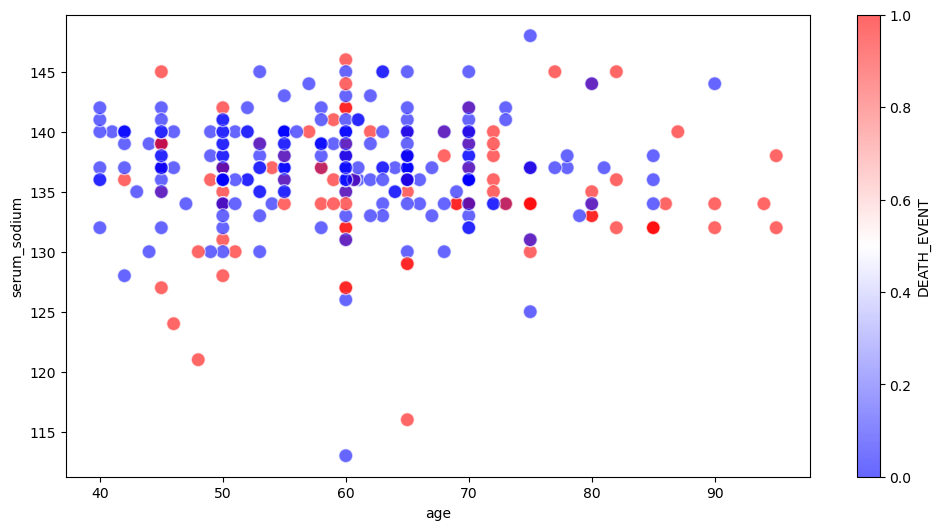

In [18]:


def plot_scatter(df, factor1, factor2, target):
    plt.figure(figsize=(12, 6))
    plt.scatter(df[factor1], 
                df[factor2], 
                c=df[target], 
                cmap='bwr',  
                alpha=0.6, 
                edgecolors='w', 
                s=100)
    
    plt.xlabel(factor1)
    plt.ylabel(factor2)
    plt.colorbar(label=target)
    plt.show()

plot_scatter(df, 'age', 'serum_sodium', 'DEATH_EVENT')

- DISTRIBUCIÓN DE LOS DATOS

También se evalua qué tan cercana o alejada puede ser la tendencia de los datos a una distribución normal gausiana.

In [41]:

from scipy.stats import norm

def plot_normal(df, factor):
    data = df[factor]

    sns.histplot(data, kde=True, stat='density', color='blue', bins=40)
    
    mean, std = np.mean(data), np.std(data)
    x = np.linspace(data.min(), data.max(), 100)
    p = norm.pdf(x, mean, std)
    
    # Graficar la distribución normal
    plt.plot(x, p, 'r--', label='Normal')
    plt.xlabel(factor)
    plt.ylabel('Densidad')
    plt.title(f'Distribución de {factor} vs Normal')
    plt.legend()
    plt.show()

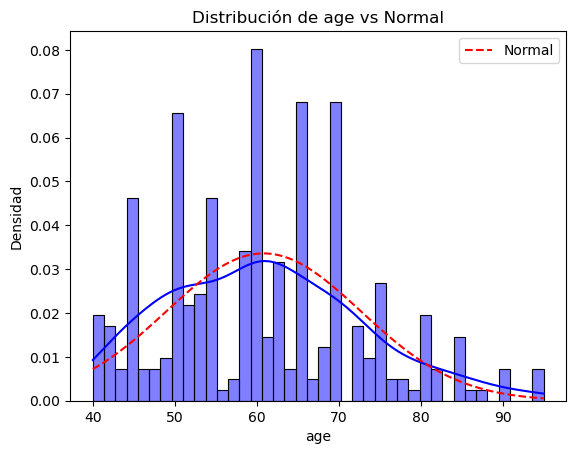

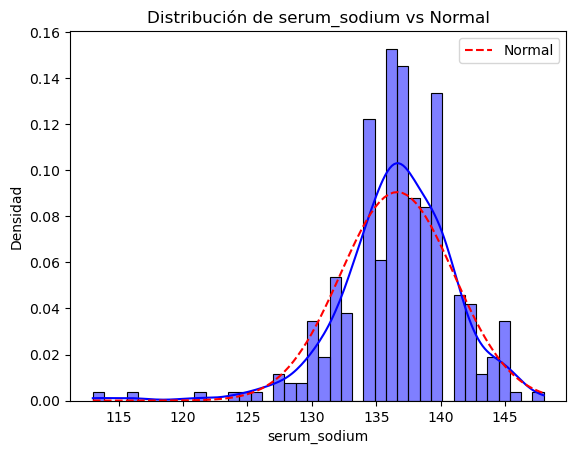

In [47]:
plot_normal(df,'age')
plot_normal(df,'serum_sodium')


Se observa que los datos correspondientes al factor "edad" tienen forma de una distribución normal pero un poco desplazada hacia la derecha, pasa de forma similar para los correspondiente a "serum_sodium" pero ésta vez desplazados hacia la izquierda. Para saber si efectivamente son normales o no, se tendria que hacer una evaluación con pruebas estádisticas para saber sí cumplen o no.

- Matriz de correlación

También se puede crear una matríz de correlación,en ésta matríx los valores de correlación varían entre -1 y 1.
Siendo entonces 1 una correlación perfecta positiva, -1 una correlación perfecta negativa o 0 sin correlación.

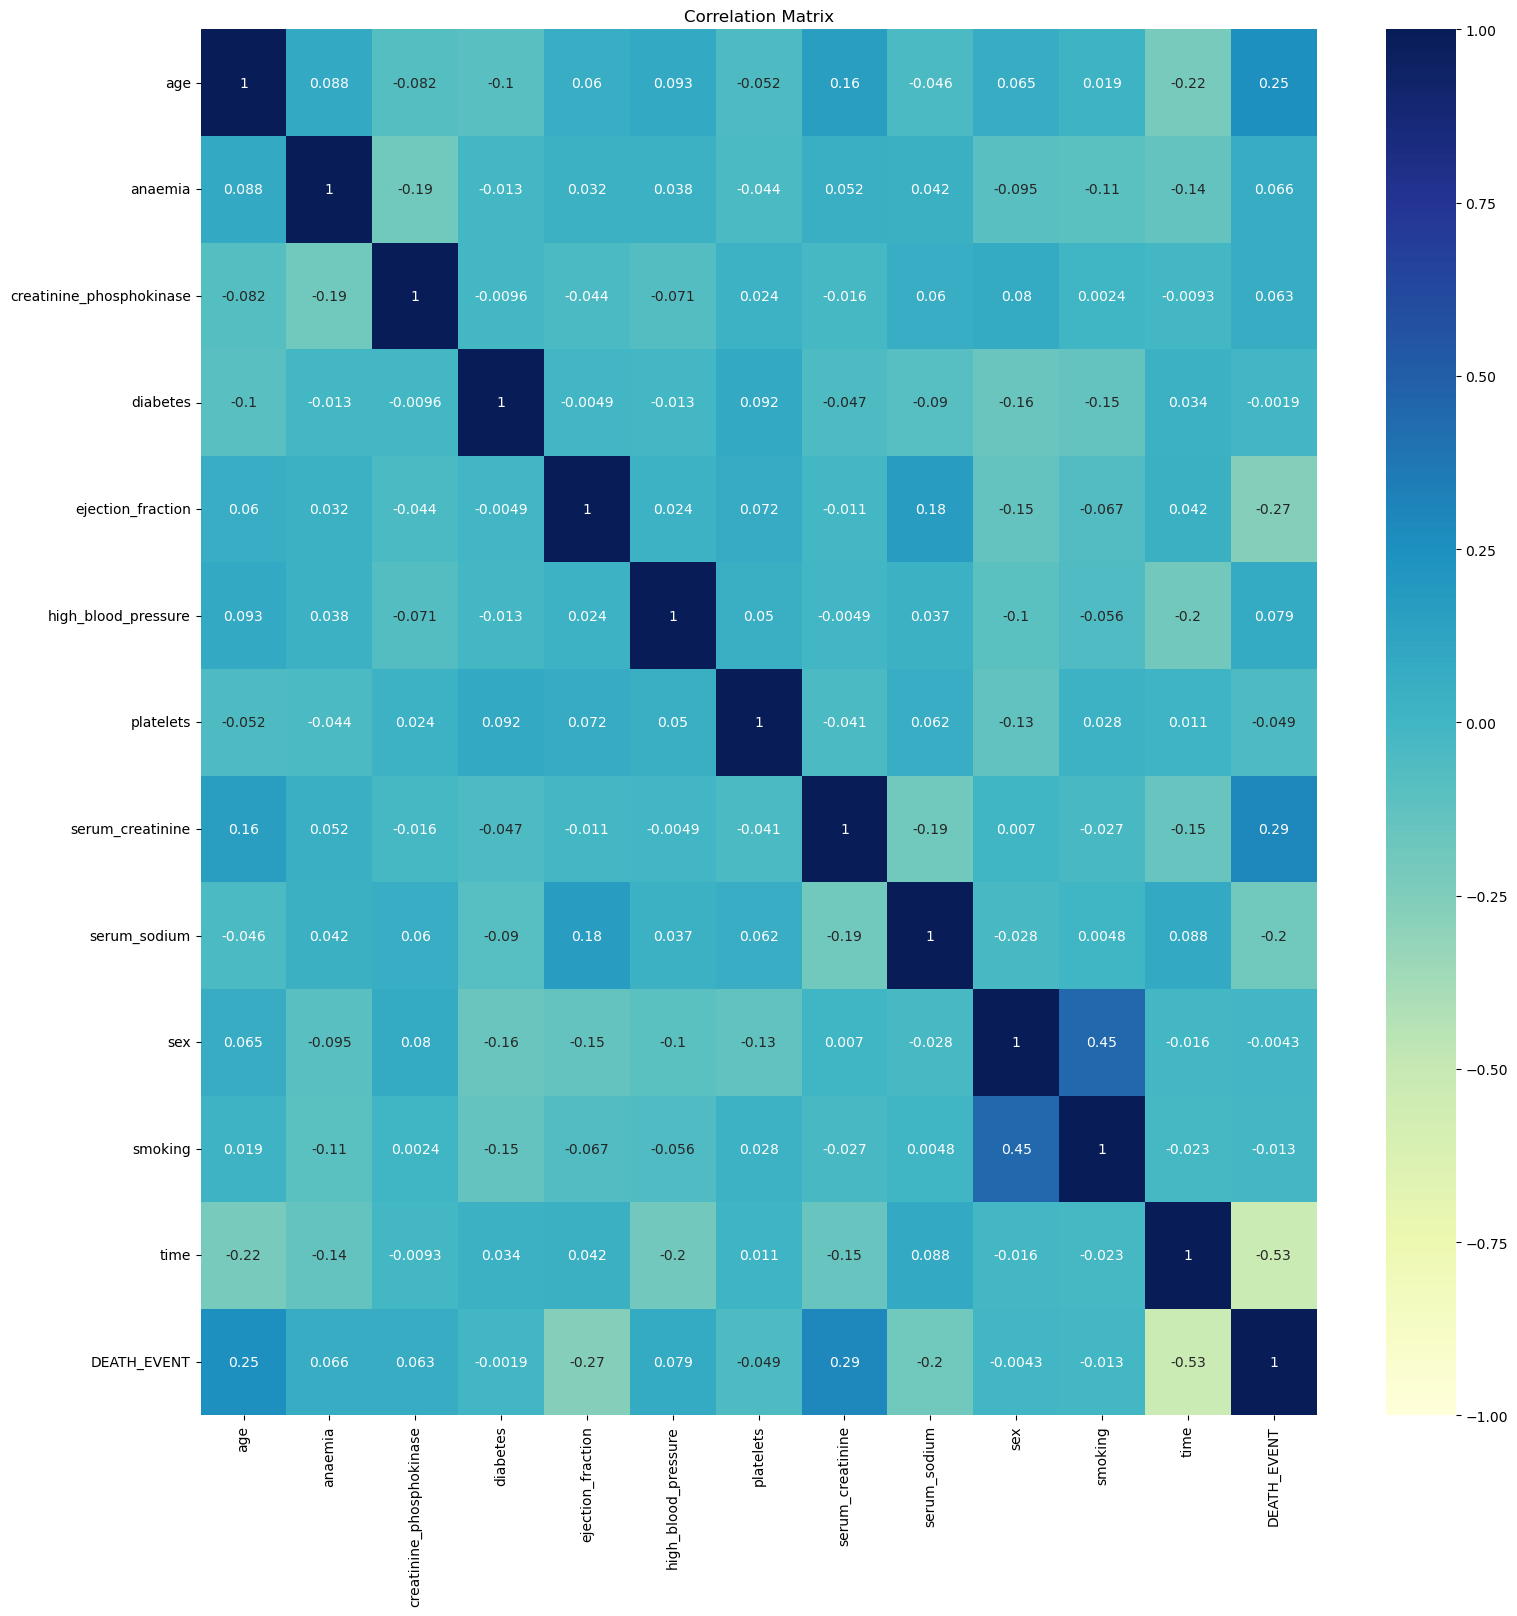

In [42]:
#Matriz de correlaciones
corr_matrix = df.corr()
#Gráfico de la matriz de correlaciones
plt.figure(figsize=(18,18))
sns.heatmap(corr_matrix, annot = True, vmin = -1, vmax = 1, cmap = "YlGnBu").set_title('Correlation Matrix')
plt.show()

También es de vital importancia observar la correlación con el target

Y la correlación de las variables, con el target

In [43]:
#Correlaciones de las variables con la variable objetivo
target_corr_df = pd.DataFrame(corr_matrix["DEATH_EVENT"].sort_values(ascending=False))
target_corr_df

,DEATH_EVENT
DEATH_EVENT,1.000000
serum_creatinine,0.294278
age,0.253729
high_blood_pressure,0.079351
anaemia,0.066270
creatinine_phosphokinase,0.062728
diabetes,-0.001943
sex,-0.004316
smoking,-0.012623
platelets,-0.049139


De éstos datos se puede decir que los factores que obtuvieron la correlación más alta fueron: serum_creatinine, age, serum_sodium, ejection_fraction y time, Siendo el más alto time. El factor con el valor de correlación más bajo fue sexo y diabetes.

Pero, de manera general, la correlación númerica no tuvo un valor alto para todos los factores con respecto al target.